In [16]:
%pip install numpy
import numpy
# scipy.special for the sigmoid function expit()
%pip install scipy
import scipy.special
# neural network class definition
class neuralNetwork: 
     # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    # Train the neural network
    def train(self, inputs_list, target_list):
        # Convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin = 2).T
        targets = numpy.array(target_list, ndmin=2).T

        # Calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layers
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals into final output layer 
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # Output layer error is the (target - actual)
        output_errors = targets - final_outputs
        
        # Hidden layer is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # Update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass

    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\karri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\karri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [17]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.3 
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [18]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [19]:
%pip install numpy
import numpy
%pip install matplotlib
%matplotlib inline
import matplotlib.pyplot
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\karri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\karri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [20]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [21]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all records in the test set 
for record in test_data_list:
    # Split the record by the ',' commas
    all_values = record.split(',')
    # Correct answer is first value
    correct_label = int(all_values[0])
    # Scale and shift the inputs 
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Query the network
    outputs = n.query(inputs)
    # The index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # Append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass

    pass

In [22]:
print(scorecard)

# Calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
performance =  0.6


In [23]:
from PIL import Image
import numpy as np
%pip install imageio
import imageio.v3
import glob
our_own_dataset = []

for image_file_name in glob.glob('custom_images/number5.png'):
    
    print('loading...', image_file_name)

    # read image directly without resizing, assuming it is already 28x28
    img = Image.open(image_file_name)

    # convert the image to grayscale ('L' stands for 'luminance')
    img_array = np.array(img.convert('L'))

    # invert the image: in many image datasets, the digit is white on black background,
    # but we might want it black on white for processing
    img_data = 255.0 - img_array.flatten()

    # normalize the image data to 0.01 - 1.0, as neural networks prefer
    img_data = (img_data / 255.0 * 0.99) + 0.01

    # extract the digit label from the filename
    label = int(image_file_name[-5:-4])

    # logging to ensure everything is working as expected
    print(numpy.min(img_data))
    print(numpy.max(img_data))

    # append label and image data to our dataset
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

Note: you may need to restart the kernel to use updated packages.
loading... custom_images/number5.png
0.01
0.6156470588235294


You should consider upgrading via the 'c:\Users\karri\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


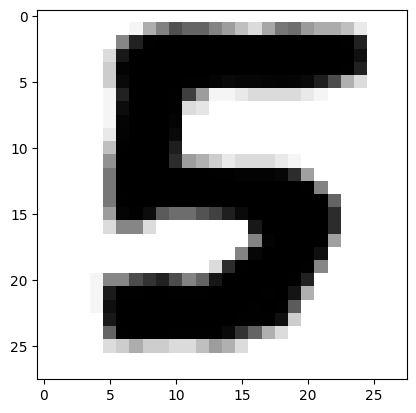

In [24]:
matplotlib.pyplot.imshow(our_own_dataset[0][1:].reshape(28, 28), cmap='Greys', interpolation='None')

In [25]:
# extract label and pixel data for image

label, img_data = our_own_dataset[0][0], our_own_dataset[0][1:]

output = n.query(img_data)

predicted_label = np.argmax(output)

# print actual and predicted labels to evaluate accuray

print(f"Actual Digit:", {label})
print(f"Predicted Digit:", {predicted_label})


# Additionally, print out confidence scores for each digit
print("Confidence Scores for each Digit:")
for i, score in enumerate(output.flatten(), start=0):
    print(f"Digit {i}: {score:.4f}")

# Highlight the digit with the highest confidence score
highest_confidence_score = np.max(output)
print(f"\nHighest Confidence Score: {highest_confidence_score:.4f} for Digit {predicted_label}")

Actual Digit: {5.0}
Predicted Digit: {3}
Confidence Scores for each Digit:
Digit 0: 0.0814
Digit 1: 0.0351
Digit 2: 0.0488
Digit 3: 0.2869
Digit 4: 0.2419
Digit 5: 0.0371
Digit 6: 0.1437
Digit 7: 0.0537
Digit 8: 0.0489
Digit 9: 0.0109

Highest Confidence Score: 0.2869 for Digit 3


In [26]:
import os
import numpy as np
import imageio.v3 as imageio
from PIL import Image

def preprocess_image(image_path):
    # Open the image file directly without resizing, assuming it is already 28x28
    img = Image.open(image_path)

    # Convert the image to grayscale ('L' stands for 'luminance')
    img_array = np.array(img.convert('L'))

    # Invert the image: in many image datasets, the digit is white on black background,
    # but we might want it black on white for processing
    img_data = 255.0 - img_array.flatten()

    # Normalize the image data to 0.01 - 1.0, as neural networks prefer
    img_data = (img_data / 255.0 * 0.99) + 0.01

    return img_data

# Directory containing images
image_directory = r'C:\Users\karri\OneDrive\Documents\machine\custom_images'

# Load all images from the directory
image_files = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if file.endswith('.png')]

scorecard = []

for image_path in image_files:
    # Preprocess image without unnecessary resizing
    img_data = preprocess_image(image_path)

    # Query the model with the preprocessed image data
    output = n.query(img_data)

    # Extract the predicted label and the actual label
    predicted_label = np.argmax(output)
    actual_label = int(os.path.basename(image_path).split('number')[-1].split('.')[0])

    # Check if prediction is correct
    correct = int(predicted_label == actual_label)
    scorecard.append(correct)

    # Print actual and predicted labels to evaluate accuracy
    print(f"\nImage: {image_path}")
    print(f"Actual Digit: {actual_label}")
    print(f"Predicted Digit: {predicted_label}")
    print(f"Correct: {correct}")

    # Additionally, print out confidence scores for each digit
    print("Confidence Scores for each Digit:")
    for i, score in enumerate(output.flatten(), start=0):
        print(f"Digit {i}: {score:.4f}")

    # Highlight the digit with the highest confidence score
    highest_confidence_score = np.max(output)
    print(f"Highest Confidence Score: {highest_confidence_score:.4f} for Digit {predicted_label}")

# Calculate and print overall accuracy
accuracy = sum(scorecard) / len(scorecard)
print(f"\nOverall Accuracy: {accuracy:.4f}")


Image: C:\Users\karri\OneDrive\Documents\machine\custom_images\number1.png
Actual Digit: 1
Predicted Digit: 1
Correct: 1
Confidence Scores for each Digit:
Digit 0: 0.0533
Digit 1: 0.4660
Digit 2: 0.1428
Digit 3: 0.2668
Digit 4: 0.0172
Digit 5: 0.0513
Digit 6: 0.0374
Digit 7: 0.0380
Digit 8: 0.2230
Digit 9: 0.0141
Highest Confidence Score: 0.4660 for Digit 1

Image: C:\Users\karri\OneDrive\Documents\machine\custom_images\number2.png
Actual Digit: 2
Predicted Digit: 0
Correct: 0
Confidence Scores for each Digit:
Digit 0: 0.5327
Digit 1: 0.1335
Digit 2: 0.1278
Digit 3: 0.2133
Digit 4: 0.0353
Digit 5: 0.0886
Digit 6: 0.0388
Digit 7: 0.0289
Digit 8: 0.0792
Digit 9: 0.0074
Highest Confidence Score: 0.5327 for Digit 0

Image: C:\Users\karri\OneDrive\Documents\machine\custom_images\number3.png
Actual Digit: 3
Predicted Digit: 3
Correct: 1
Confidence Scores for each Digit:
Digit 0: 0.0555
Digit 1: 0.0366
Digit 2: 0.0496
Digit 3: 0.6997
Digit 4: 0.2499
Digit 5: 0.0296
Digit 6: 0.0258
Digit 7: 0